# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [8]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DanGo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
# Read your api key environment variable
import os
from dotenv import load_dotenv
load_dotenv()

True

In [10]:
# Create a newsapi client
news_API = os.getenv("news_api")

In [11]:
print(news_API)

797039b8377e49dc9536c7ce870b383f


In [12]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key = news_API)
newsapi

In [13]:
# Fetch the Bitcoin news articles
Bitcoin = newsapi.get_everything(q="bitcoin", language="en")
Bitcoin

{'status': 'ok',
 'totalResults': 7597,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Karissa Bell',
   'title': 'Twitter will let users send and receive Bitcoin tips',
   'description': 'Four months after Twitter first introduced in-app tipping, the company is expanding its “tip jar” feature in a major way. The company is opening up tipping to all its users globally, and for the first time will allow some users to send and receive tips in Bit…',
   'url': 'https://www.engadget.com/twitter-opens-tipping-in-bitcoin-170017891.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-09/28751be0-1c8e-11ec-9ffb-353ffababd7e',
   'publishedAt': '2021-09-23T17:00:17Z',
   'content': 'Four months after Twitter first introduced in-app tipping, the company is expanding its tip jar feature in a major way. The company is opening up tipping to all its users globally, and for the first … [+2390 chars]'},
  {'source': {'id': 'engadget', 'name': 'Enga

In [14]:
# Fetch the Ethereum news articles
ETH = newsapi.get_everything(q="etherium", language="en")
ETH

{'status': 'ok',
 'totalResults': 22,
 'articles': [{'source': {'id': None, 'name': 'Yahoo Entertainment'},
   'author': 'Bryan Ke',
   'title': "'I have nothing left to live for': Evergrande meeting descends into chaos as investor pulls knife and threatens to kill herself",
   'description': 'A compilation video that shows desperate investors confronting Evergrande staff amid the company’s financial issues has gone viral on Chinese social media...',
   'url': 'https://news.yahoo.com/nothing-left-live-evergrande-meeting-174442622.html',
   'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/KUw4qo9EIz7VbbKgYUv_fA--~B/aD00MjU7dz04MDA7YXBwaWQ9eXRhY2h5b24-/https://media.zenfs.com/en/nextshark_articles_509/483f64498cefe53217f4d52a4d99d33d',
   'publishedAt': '2021-10-01T17:44:42Z',
   'content': 'A compilation video that shows desperate investors confronting Evergrande staff amid the companys financial issues has gone viral on Chinese social media platform Weibo.\r\nThe confrontation: The 10-

In [15]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = pd.DataFrame.from_dict(Bitcoin["articles"])

btc_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'engadget', 'name': 'Engadget'}",Karissa Bell,Twitter will let users send and receive Bitcoi...,Four months after Twitter first introduced in-...,https://www.engadget.com/twitter-opens-tipping...,https://s.yimg.com/os/creatr-uploaded-images/2...,2021-09-23T17:00:17Z,Four months after Twitter first introduced in-...
1,"{'id': 'engadget', 'name': 'Engadget'}",Andrew Tarantola,Hitting the Books: How Bitcoin is somehow wort...,Bitcoin and similar blockchain-based cryptos e...,https://www.engadget.com/hitting-the-books-the...,https://s.yimg.com/os/creatr-uploaded-images/2...,2021-09-25T15:30:24Z,Bitcoin and similar blockchain-based cryptos e...
2,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),Bitcoin hits strongest level since May,"<ul><li>Bitcoin, in terms of market value, ros...",https://techncruncher.blogspot.com/2021/10/bit...,https://blogger.googleusercontent.com/img/a/AV...,2021-10-06T17:17:00Z,"<ul><li>Bitcoin, in terms of market value, ros..."
3,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),"BTC, DOGE, and SHIBA Price Analysis for October 6",How high are the chances of Bitcoin sustaining...,https://techncruncher.blogspot.com/2021/10/btc...,None,2021-10-06T19:49:00Z,How high are the chances of Bitcoin sustaining...
4,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),JPMorgan CEO Says Bitcoin Has No Intrinsic Val...,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,https://techncruncher.blogspot.com/2021/10/jpm...,None,2021-10-04T19:49:00Z,JPMorgan CEO Jamie Dimon is still not a Bitcoi...


In [16]:
# Create the Ethereum sentiment scores DataFrame
eth_df = pd.DataFrame.from_dict(ETH["articles"])

eth_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Yahoo Entertainment'}",Bryan Ke,'I have nothing left to live for': Evergrande ...,A compilation video that shows desperate inves...,https://news.yahoo.com/nothing-left-live-everg...,https://s.yimg.com/uu/api/res/1.2/KUw4qo9EIz7V...,2021-10-01T17:44:42Z,A compilation video that shows desperate inves...
1,"{'id': None, 'name': 'AppleInsider'}",news@appleinsider.com (Amber Neely),PayPal prepared to spend $45 billion to acquir...,PayPal may soon make a foray into social media...,https://appleinsider.com/articles/21/10/20/pay...,https://photos5.appleinsider.com/gallery/45167...,2021-10-20T19:31:13Z,AppleInsider is supported by its audience and ...
2,"{'id': None, 'name': 'The A.V. Club'}",Tatiana Tenreyro,The furries aren't here for Lindsay Lohan's fu...,Lindsay Lohan’s had a busy year for someone wh...,https://www.avclub.com/the-furries-arent-here-...,https://i.kinja-img.com/gawker-media/image/upl...,2021-10-01T17:30:00Z,Lindsay Lohans had a busy year for someone who...
3,"{'id': None, 'name': 'Viera Voice'}",HENRY A. STEPHENS,Cryptocurrency gaining traction among young in...,"Mike Persichetti, the sales manager at Cocoa’s...",https://www.vieravoice.com/business/cryptocurr...,None,2021-10-01T13:45:00Z,"Mike Persichetti, the sales manager at Cocoas ..."
4,"{'id': None, 'name': 'Fast Company'}",Michael Grothaus,SHIB coin: why is the Shiba Inu cryptocurrency...,SHIB is up over 47% in the last 24 hours.\nIt’...,https://www.fastcompany.com/90684269/shib-coin...,https://images.fastcompany.net/image/upload/w_...,2021-10-07T07:45:16Z,It’s been a good week for cryptocurrency trade...


In [17]:
# Describe the Bitcoin Sentiment
btc_sentiments = []

for article in Bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_sent_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_sent_df = btc_sent_df[cols]

btc_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2021-09-23,Four months after Twitter first introduced in-...,0.0000,0.000,0.000,1.000
1,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000
2,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924
3,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781
4,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884


In [18]:
# Describe the Ethereum Sentiment
eth_sentiments = []

for article in ETH["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_sent_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sent_df = eth_sent_df[cols]
eth_sent_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.313715,0.109200,0.039150,0.851650
std,0.434186,0.070028,0.065837,0.083257
min,-0.750600,0.000000,0.000000,0.718000
25%,0.051675,0.061000,0.000000,0.791250
50%,0.449600,0.120500,0.000000,0.861000
75%,0.578775,0.139750,0.049750,0.905250
max,0.888500,0.258000,0.220000,1.000000


Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [21]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [22]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')

# Expand the default stopwords list if necessary
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DanGo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw)]
    
    return output

In [27]:
# Create a new tokens column for Bitcoin
btc_sent_df['tokens'] = btc_sent_df['text'].apply(tokenizer)
btc_sent_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-09-23,Four months after Twitter first introduced in-...,0.0000,0.000,0.000,1.000,"[four, month, twitter, first, introduced, inap..."
1,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000,"[bitcoin, similar, blockchainbased, cryptos, e..."
2,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924,"[ullibitcoin, term, market, value, rose, lilii..."
3,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781,"[high, chance, bitcoin, sustaining, gain, push..."
4,2021-10-04,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.000,0.116,0.884,"[jpmorgan, ceo, jamie, dimon, still, bitcoin, ..."


In [28]:
# Create a new tokens column for Ethereum
eth_sent_df['tokens'] = eth_sent_df['text'].apply(tokenizer)

eth_sent_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-01,A compilation video that shows desperate inves...,-0.6369,0.000,0.193,0.807,"[compilation, video, show, desperate, investor..."
1,2021-10-20,AppleInsider is supported by its audience and ...,0.4588,0.121,0.000,0.879,"[appleinsider, supported, audience, may, earn,..."
2,2021-10-01,Lindsay Lohans had a busy year for someone who...,0.2960,0.058,0.000,0.942,"[lindsay, lohans, busy, year, someone, hasnt, ..."
3,2021-10-01,"Mike Persichetti, the sales manager at Cocoas ...",0.8591,0.226,0.028,0.746,"[mike, persichetti, sale, manager, cocoas, par..."
4,2021-10-07,It’s been a good week for cryptocurrency trade...,0.5719,0.139,0.000,0.861,"[good, week, cryptocurrency, trader, wednesday..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [29]:
from collections import Counter
from nltk import ngrams

In [30]:
# Generate the Bitcoin N-grams where N=2
big_string1 = btc_sent_df['text'].str.cat()
processed = tokenizer(big_string1)
bigramsB = ngrams(processed, n=2)

In [31]:
# Generate the Ethereum N-grams where N=2
big_string2 = eth_sent_df['text'].str.cat()
processed = tokenizer(big_string2)
bigramsE = ngrams(processed, n=2)

In [32]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [33]:
# Use token_count to get the top 10 words for Bitcoin
top10_btc = token_count(bigramsB, 10)
top10_btc

[(('central', 'bank'), 2),
 (('cryptocurrency', 'bitcoin'), 2),
 (('illustration', 'taken'), 2),
 (('oct', 'reuters'), 2),
 (('reuters', 'bitcoin'), 2),
 (('exchange', 'commission'), 2),
 (('four', 'month'), 1),
 (('month', 'twitter'), 1),
 (('twitter', 'first'), 1),
 (('first', 'introduced'), 1)]

In [34]:
# Use token_count to get the top 10 words for Ethereum
top10_eth = token_count(bigramsE, 10)
top10_eth

[(('charsits', 'good'), 2),
 (('good', 'week'), 2),
 (('week', 'cryptocurrency'), 2),
 (('cryptocurrency', 'trader'), 2),
 (('trader', 'wednesday'), 2),
 (('wednesday', 'bitcoin'), 2),
 (('bitcoin', 'surged'), 2),
 (('high', 'according'), 2),
 (('according', 'coindesk'), 2),
 (('coindesk', 'main'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

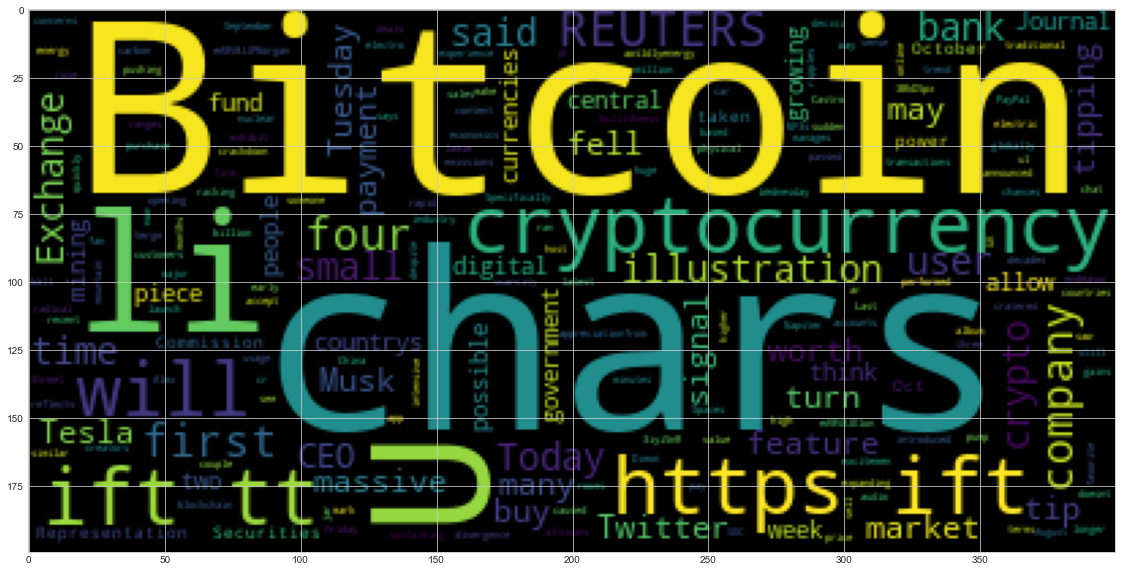

In [36]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(big_string1)
plt.imshow(wc_btc)

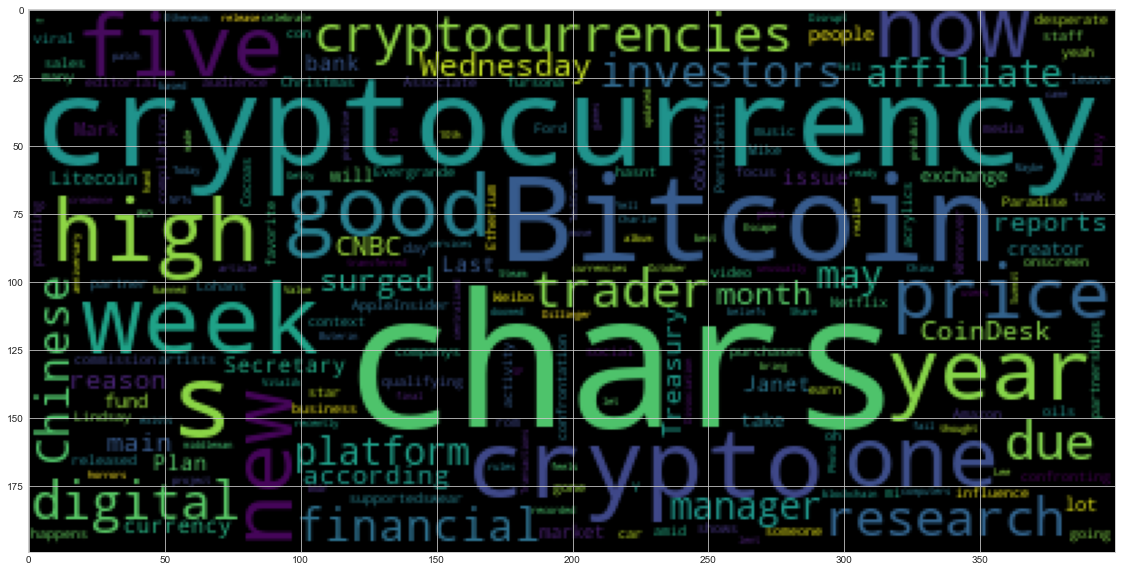

In [37]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(big_string2)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [41]:
import spacy
from spacy import displacy

In [42]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-10-21 22:10:36.736465: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-10-21 22:10:36.736511: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [43]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [44]:
# Concatenate all of the Bitcoin text together
bitcoin_text = (big_string1)

In [45]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["NER Visualization - Bitcoin"] = "NER Visualization - Bitcoin"

In [46]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [47]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text)

Four months
Twitter first
first
first
Napster
4.6%
53,859.6.</li><li
$50,000 mark
first
four weeks
Tuesday
50,000
Jamie Dimon
U.Today https://ift.tt/3iyi5nR
Musk
$1.6 billion
Wednesday
a couple of minutes
Alex Castro
The Verge

The Peoples Bank of China
Friday
the Wall Street Journal
three
Journal
Spaces
two decades
403 million
23 August
UK
four
SEC
two
Kristalina Georgieva
Elon Musk
Tuesday
U.S.
Canada
Bitcoin
Alberta
Link Global
Bitcoin
June 29, 2021
Dado Ruvic/IllustrationHONG KONG
Reuters
Bitcoin
October 19, 2021
Edgar SuLONDON
Reuters
16
Bitcoins
Exchange Commission
Andrew Kelly
The US Securities and Exchange Commission
as many as four
October


---

### Ethereum NER

In [48]:
# Concatenate all of the Ethereum text together
eth_text = (big_string2)

In [49]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["NER Visualization - Etherium"] = "NER Visualization - Etherium"

In [50]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [51]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text)

Chinese
Weibo
10
Amazon Associate
Lohans
a busy year
Persichetti
Cocoas Paradise Ford
a good week
Wednesday
Bitcoin
five-month
55,735.52
CoinDesk
CNBC
Treasury
Janet Y
Bitcoin or Etherium
China
chars]Today
five years
Dissociation
October 14, 2016
five years
a good week
Wednesday
Bitcoin
5-month
55,735.52
CoinDesk
CNBC
Treasury
Janet Yell
Last week
Steam
Buterin
Ethereum
2017
3.1.0
Litecoin
Charlie Lee
10th
Litecoin
GPU
Henry Singleton Series
PDF
4
one
Mark Yusko
the last few weeks
US
Gojda
Shutterstock.com
Chinese
Bitcoin
May
SaaS
MVP
chars]By
over $2 trillion


---